In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cerezos = pd.read_csv('CerezoNegro.csv')
ascombe = pd.read_csv('CuartetoAnscombe.csv')
iris = pd.read_csv('iris.data.mio.csv')

# EJERCICIO 1

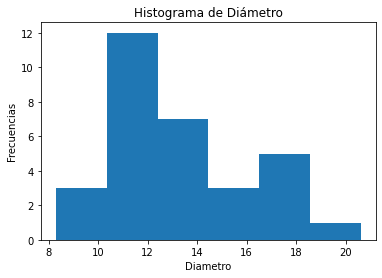

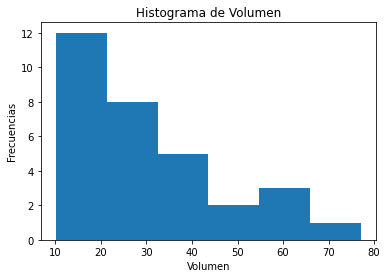

In [3]:
cerezos['Girth'].hist(bins=6, grid=False)
plt.title('Histograma de Diámetro')
plt.xlabel('Diametro')
plt.ylabel('Frecuencias')
plt.show()

cerezos['Volume'].hist(bins=6, grid=False)
plt.title('Histograma de Volumen')
plt.xlabel('Volumen')
plt.ylabel('Frecuencias')
plt.show()

# EJERCICIO 2

In [4]:
pd.options.display.float_format = '{:,.2f}'.format # se muestran solo dos decimales

print('MEDIAS\n')
print(np.mean(cerezos))
print('\nMODAS\n')
print(cerezos.apply(lambda x: stats.mode(x)[0][0], axis=0, result_type='reduce'))
print('\nVARIANZAS\n')
print(np.var(cerezos))
print('\nCOEFICIENTES DE VARIACION\n')
print(np.mean(cerezos)/np.std(cerezos))

MEDIAS

Tree     16.00
Girth    13.25
Height   76.00
Volume   30.17
dtype: float64

MODAS

Tree      1.00
Girth    11.00
Height   80.00
Volume   10.30
dtype: float64

VARIANZAS

Tree      80.00
Girth      9.53
Height    39.29
Volume   261.49
dtype: float64

COEFICIENTES DE VARIACION

Tree      1.79
Girth     4.29
Height   12.12
Volume    1.87
dtype: float64


# EJERCICIO 3

In [5]:
pd.options.display.float_format = '{:,.2f}'.format # se muestran solo dos decimales

print('MEDIAS\n')
print(np.mean(iris.iloc[:, :4]))
print('\nMODAS\n')
print(iris.iloc[:, :4].apply(lambda x: stats.mode(x)[0][0], axis=0, result_type='reduce'))
print('\nVARIANZAS\n')
print(np.var(iris.iloc[:, :4]))
print('\nCOEFICIENTES DE VARIACION\n')
print(np.mean(iris.iloc[:, :4])/np.std(iris.iloc[:, :4]))
print('\nNumero de valores distintos en class\n')
print(iris.iloc[:, 4].value_counts())

MEDIAS

sepal_length   5.84
sepal_width    3.05
petal_length   3.76
petal_width    1.20
dtype: float64

MODAS

sepal_length   5.00
sepal_width    3.00
petal_length   1.50
petal_width    0.20
dtype: float64

VARIANZAS

sepal_length   0.68
sepal_width    0.19
petal_length   3.09
petal_width    0.58
dtype: float64

COEFICIENTES DE VARIACION

sepal_length   7.08
sepal_width    7.07
petal_length   2.14
petal_width    1.58
dtype: float64

Numero de valores distintos en class

0    50
1    50
2    50
Name: class, dtype: int64


La variable con mayor varianza es la longitud del pétalo. Las variables sépalo muestran mayor dispersión que las variables pétalo segun los coeficientes de variación. Las clases tienen un numero de observaciones homogeneo.

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

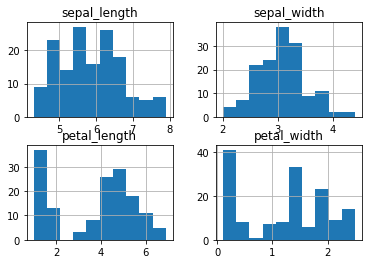

In [6]:
iris.iloc[:, :4].hist(bins=10)

En los histogramas se observa que las variables son bimodales, por lo que es una buena idea estudiar distribuciones conjuntas.

Elegantísimo articulo de Fisher sobre el análisis discriminante.

# EJERCICIO 4

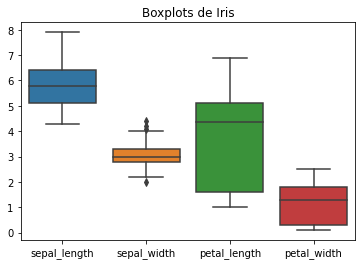

In [7]:
import seaborn as sns

sns.boxplot(data=iris.iloc[:, :4])
plt.title('Boxplots de Iris')
plt.show()

# EJERCICIO 5

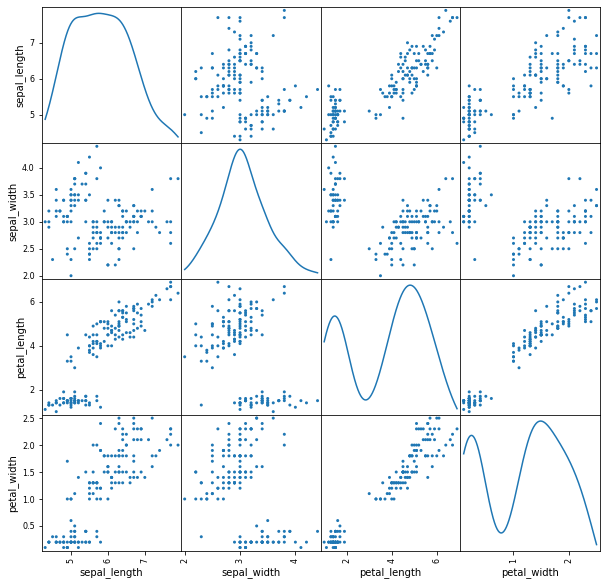

In [8]:
pd.plotting.scatter_matrix(iris.iloc[:, :4], alpha=1, figsize=(10, 10), diagonal='kde')
plt.show()

# EJERCICIO 6

## Interpretación: 

Las variables ordenadas de menor a mayor varianza son: 1, 2, 3. Las variables con mayor covarianza son 1 y 3, lo que indica una fuerte relación. En la matriz de covarianzas se confirma que las variables 1 y 3 guardan una fuerte correlación. Es decir, El diametro de un arbol esta relacionado con su volumen.



In [9]:
iris.iloc[:, :4].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.69,-0.04,1.27,0.52
sepal_width,-0.04,0.19,-0.32,-0.12
petal_length,1.27,-0.32,3.11,1.30
petal_width,0.52,-0.12,1.30,0.58


In [10]:
iris.iloc[:, :4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


Conclusiones:
    
- La longitud del sépalo y la longitud del pétalo muestran una covarianza significativamente alta. La matriz de correlaciones confirma esta fuerte relación directa con un valor positivo y cercano a 1 (0.87).

- La longitud del sépalo y la longitud del sépalo muestran una covarianza muy alta con respecto al resto de pares. La matriz de correlaciones confirma esta fuerte relación directa con un valor positivo y cercano a 1 (0.82).

- La longitud del pétalo y la anchura del pétalo muestran una covarianza significativamente grande con respecto al resto de pares. la matriz de correlaciones confirma dicha relación directa con un valor positivo y cercano a 1 (0.96).

# EJERCICIO 7

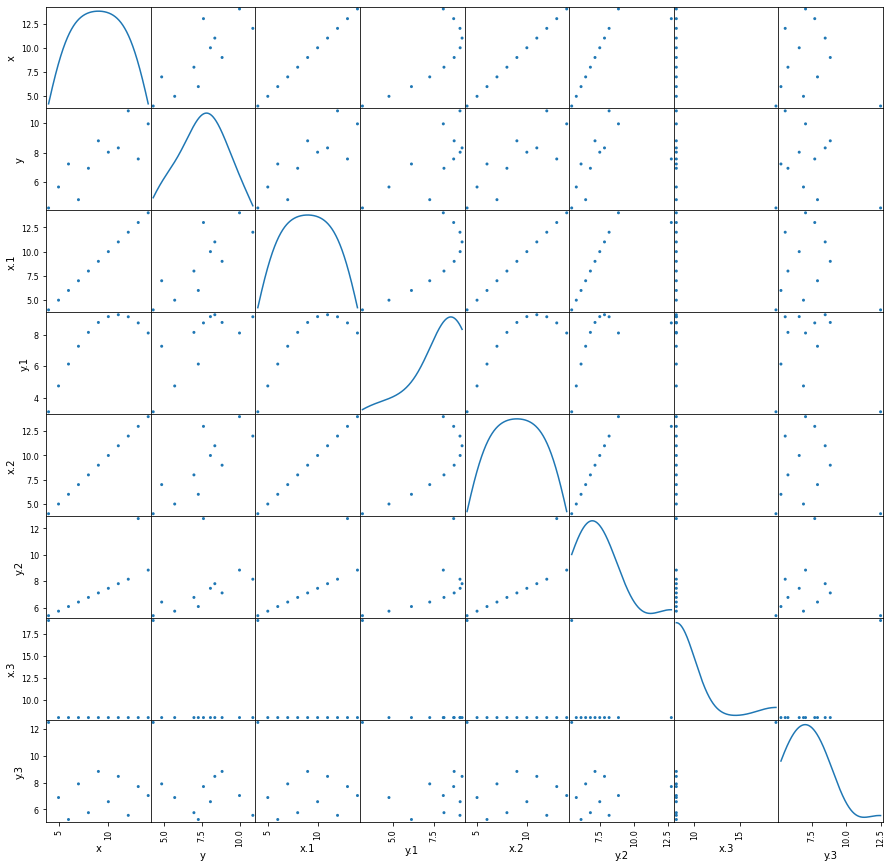

In [11]:
pd.plotting.scatter_matrix(ascombe, alpha=1, figsize=(15, 15), diagonal='kde')
plt.show()

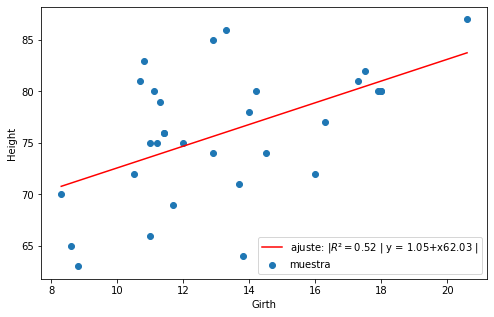

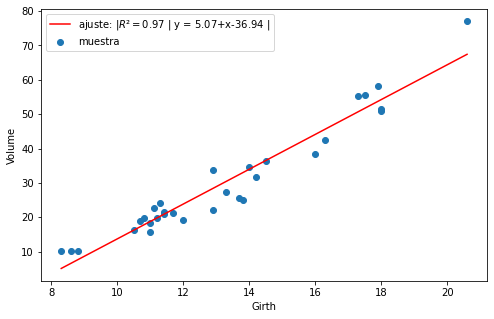

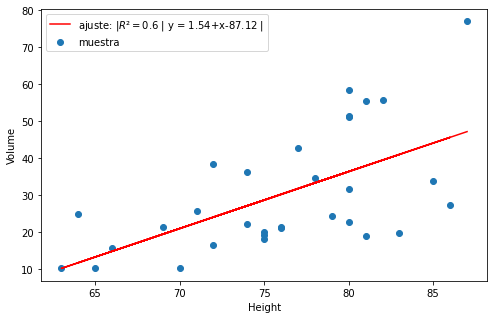

In [12]:
import itertools

x=cerezos.values[:, 1:]
regresiones = list(itertools.combinations(range(3), 2)) # se forman todos los pares posibles de variables en los datos

for par in regresiones: # para cada par de variables, representar nube de puntos y ajustar recta OLS
    
    a = x[:,par][:, 0]
    b = x[:,par][:, 1]
    
    c1, c2 = np.polyfit(a, b, 1)
    
    plt.figure(figsize=(8,5))
    r = np.corrcoef(a, b)
    
    plt.scatter(a, b)
    plt.xlabel(cerezos.columns[par[0]+1])
    plt.ylabel(cerezos.columns[par[1]+1])

    plt.plot(a, c1*a+c2, c='red')
    plt.legend([f'ajuste: |$R²={np.around(r[1,0], 2)}$ | y = {np.around(c1, 2)}+x{np.around(c2, 2)} |', 'muestra'])
    plt.show()

## RESULTADOS

La única regresión satisfactoria es volumen frente a diámetro. El resto de variables no tienen correlación lineal.

# EJERCICIO 8

La probabilidad de que salga un número par en cada lanzamiento de un dado equilibrado es:

$$p = \frac{\textrm{nº casos posibles}}{\textrm{nº casos total}} = \frac{3}{6} = \frac{1}{2}$$

Luego, el experimento es equivalente a un cara o cruz.

En general, sea $X$ el suceso "salir número par" con probabilidad $p$, la probabilidad de que se produzcan $k$ números pares en $n$ lanzamientos es:

$$p\lbrace X = k\rbrace = {n\choose k}p^k (1-p)^{n-k}$$

Es decir, sigue una distribución binomial.

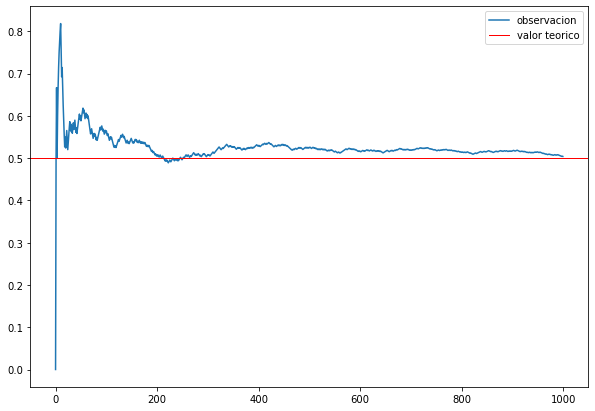

In [13]:
#prueba computacional de que la probabilidad es 1/2

n=1000
np.random.seed(0)

observaciones = np.random.randint(0,2,n)
prob = np.cumsum(observaciones)/np.cumsum(np.ones(n))

plt.figure(figsize=(10,7))
plt.plot(range(n), prob)
plt.axhline(0.5, c='red', linewidth=1)
plt.legend(['observacion', 'valor teorico']) 
plt.show()

Por último, por el teorema central de límite para un tamaño muestral suficientemente grande, la distribución binomial se aproxima a una normal. Para ver este punto, se realizan 1000 experimentos del lanzamiento de 100 dados equilibrados y se cuenta el numero de resultados pares (1). Después se generan 1000 observaciones de una distribución normal. Se ve que la distribución de numeros pares se aproxima a la normal, a falta de un test de hipótesis que lo confirme.

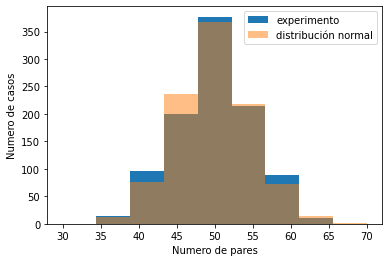

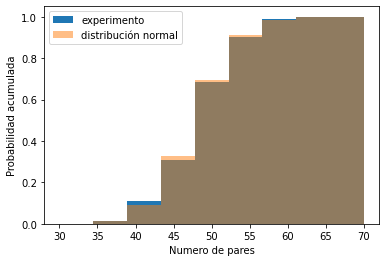

In [14]:
observaciones_experimento = 1000
n, p = 100, .5
resultados_obs = []

normal = np.random.normal(loc=n*p, scale=np.sqrt(n*p*(1-p)), size=1000)

for i in range(observaciones_experimento):
    
    np.random.seed(i)
    resultados_obs.append(np.sum(np.random.randint(0,2,n)))

plt.hist(resultados_obs, bins=np.linspace(30, 70, 10)) #histograma numero de pares en 100 lanzamientos de dados
plt.hist(normal, bins=np.linspace(30, 70, 10), alpha=.5) #histograma distribucion normal
plt.legend(['experimento', 'distribución normal'])
plt.xlabel('Numero de pares')
plt.ylabel('Numero de casos')

plt.show()

plt.hist(resultados_obs, bins=np.linspace(30, 70, 10), cumulative=True, density=True)
plt.hist(normal, bins=np.linspace(30, 70, 10), cumulative=True, alpha=.5, density=True)
plt.legend(['experimento', 'distribución normal'])
plt.xlabel('Numero de pares')
plt.ylabel('Probabilidad acumulada')
plt.show()

# EJERCICIO 9

Repitiendo los pasos del ejercicio anterior y para un valor $\lambda >5$ para asegurarnos de que la cola izquierda de la normal no sesga la visualización (La poisson no admite valores negativos por la función factorial)

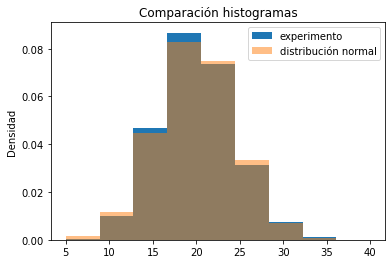

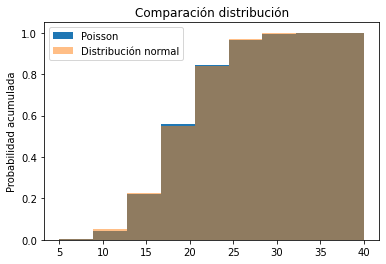

In [15]:
np.random.seed(1)
n, lamb = 100000, 20
resultados_obs = []

normal = np.random.normal(loc=lamb, scale=np.sqrt(lamb), size=n)
poisson = np.random.poisson(lam=lamb, size=n)

plt.hist(poisson, bins=np.linspace(5, 40, 10), density=True) #histograma numero de pares en 100 lanzamientos de dados
plt.hist(normal, bins=np.linspace(5, 40, 10), alpha=.5, density=True) #histograma distribucion poisson
plt.title('Comparación histogramas')
plt.legend(['experimento', 'distribución normal'])
plt.ylabel('Densidad')

plt.show()

plt.hist(poisson, bins=np.linspace(5, 40, 10), cumulative=True, density=True)
plt.hist(normal, bins=np.linspace(5, 40, 10), cumulative=True, alpha=.5, density=True)
plt.title('Comparación distribución')
plt.legend(['Poisson', 'Distribución normal'])
plt.ylabel('Probabilidad acumulada')
plt.show()

# EJERCICIO 10

La figura inferior derecha se construye con 1000 observaciones de la variable aleatoria $X \sim B(1000, \frac{1}{10})$. Por ser $n$ suficientemente grande y el valor de $n \cdot p \gt 30$ se puede aplicar el teorema central de limite, de manera que $X \sim N(np, \sqrt{np(1-p)})$. Además, dicha variable se ha estandarizado, luego, la variable es $Z = \frac{X - \mu_{X}}{\sigma_X} \sim N(0, 1)$. Por ser $Z$ normal, de deduce trivialmente que el QQ-plot de dicha muestra se ajusta al de una normal teórica.

Para reproducir este resultado con la Poisson, generamos 1000 observaciones de una distribución de Poisson  y se saca el QQ-plot.

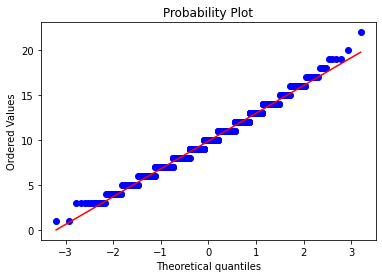

In [16]:
np.random.seed(10)
lamb=10
osm1, osr1 = stats.probplot(np.random.poisson(lam=lamb, size=1000), dist="norm", plot=plt)
osm2, osr2 = stats.probplot(np.random.normal(loc=lamb, scale=np.sqrt(lamb), size=1000), dist="norm", plot=None)
plt.show()

Si ajustamos una regresion a la nube de puntos de los cuantiles, vemos que efectivamente la pendiente es 1, es decir, es la recta identidad. Justamente, la distribución teórica de cuantiles de una normal. El F-test de regresión arroja pvalor 0 y el R² es casi 1, por lo que se puede asumir que la recta es la identidad. Además, con un nivel de significacion del 95% el coef de regresión está en el intervalo [1.005, 1.010]. 

In [17]:
import statsmodels.api as sm

#resultado de la regresion sobre los cuantiles
x, y = np.sort(osm1[1]), osm2[1]
model=sm.OLS(endog=y, exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.847e+05
Date:                Sat, 06 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:07:12   Log-Likelihood:                         -499.62
No. Observations:                1000   AIC:                                      1001.
Df Residuals:                     999   BIC:                                      1006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0078      0.001    827.446      0.000       1.005       1.010
==============================================================================
Omnibus:                      111.124   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.778
Skew:                          -0.769   Prob(JB):                     1.12e-38
Kurtosis:                       4.351   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""